In [2]:
import cv2
import matplotlib.pyplot as plt

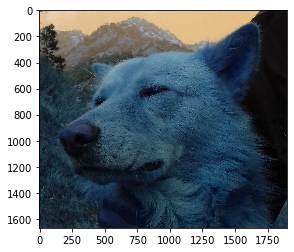

In [72]:
image = cv2.imread('20170114_155405.jpg', 1)
original_image = image.copy()
plt.imshow(image)

In [73]:
gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

In [74]:
net = cv2.dnn.readNet('yolov3.weights', 'yolov3.cfg')

In [75]:
classes = []
with open('coco.names', 'r') as f:
#     print(f.readlines())
    classes = [line.strip() for line in f.readlines()]

In [76]:
classes

['person',
 'bicycle',
 'car',
 'motorbike',
 'aeroplane',
 'bus',
 'train',
 'truck',
 'boat',
 'traffic light',
 'fire hydrant',
 'stop sign',
 'parking meter',
 'bench',
 'bird',
 'cat',
 'dog',
 'horse',
 'sheep',
 'cow',
 'elephant',
 'bear',
 'zebra',
 'giraffe',
 'backpack',
 'umbrella',
 'handbag',
 'tie',
 'suitcase',
 'frisbee',
 'skis',
 'snowboard',
 'sports ball',
 'kite',
 'baseball bat',
 'baseball glove',
 'skateboard',
 'surfboard',
 'tennis racket',
 'bottle',
 'wine glass',
 'cup',
 'fork',
 'knife',
 'spoon',
 'bowl',
 'banana',
 'apple',
 'sandwich',
 'orange',
 'broccoli',
 'carrot',
 'hot dog',
 'pizza',
 'donut',
 'cake',
 'chair',
 'sofa',
 'pottedplant',
 'bed',
 'diningtable',
 'toilet',
 'tvmonitor',
 'laptop',
 'mouse',
 'remote',
 'keyboard',
 'cell phone',
 'microwave',
 'oven',
 'toaster',
 'sink',
 'refrigerator',
 'book',
 'clock',
 'vase',
 'scissors',
 'teddy bear',
 'hair drier',
 'toothbrush']

In [77]:
layer_names = net.getLayerNames()

In [78]:
layer_names

['conv_0',
 'bn_0',
 'relu_0',
 'conv_1',
 'bn_1',
 'relu_1',
 'conv_2',
 'bn_2',
 'relu_2',
 'conv_3',
 'bn_3',
 'relu_3',
 'shortcut_4',
 'conv_5',
 'bn_5',
 'relu_5',
 'conv_6',
 'bn_6',
 'relu_6',
 'conv_7',
 'bn_7',
 'relu_7',
 'shortcut_8',
 'conv_9',
 'bn_9',
 'relu_9',
 'conv_10',
 'bn_10',
 'relu_10',
 'shortcut_11',
 'conv_12',
 'bn_12',
 'relu_12',
 'conv_13',
 'bn_13',
 'relu_13',
 'conv_14',
 'bn_14',
 'relu_14',
 'shortcut_15',
 'conv_16',
 'bn_16',
 'relu_16',
 'conv_17',
 'bn_17',
 'relu_17',
 'shortcut_18',
 'conv_19',
 'bn_19',
 'relu_19',
 'conv_20',
 'bn_20',
 'relu_20',
 'shortcut_21',
 'conv_22',
 'bn_22',
 'relu_22',
 'conv_23',
 'bn_23',
 'relu_23',
 'shortcut_24',
 'conv_25',
 'bn_25',
 'relu_25',
 'conv_26',
 'bn_26',
 'relu_26',
 'shortcut_27',
 'conv_28',
 'bn_28',
 'relu_28',
 'conv_29',
 'bn_29',
 'relu_29',
 'shortcut_30',
 'conv_31',
 'bn_31',
 'relu_31',
 'conv_32',
 'bn_32',
 'relu_32',
 'shortcut_33',
 'conv_34',
 'bn_34',
 'relu_34',
 'conv_35',
 'bn

In [79]:
output_layer = [layer_names[i[0] - 1] for i in net.getUnconnectedOutLayers()]

In [80]:
output_layer

['yolo_82', 'yolo_94', 'yolo_106']

In [81]:
height, width = gray_image.shape

In [82]:
blob = cv2.dnn.blobFromImage(image, 0.003, (512, 512), (0, 0, 0), True)

In [83]:
net.setInput(blob)
outs = net.forward(output_layer)

In [84]:
len(outs)

3

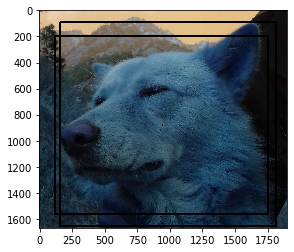

In [85]:
import numpy as np

class_ids = []
boxes = []
confidences = []

for out in outs:
    for det in out:
        scores = det[5:]
        class_id = np.argmax(scores)
        confidence = scores[class_id]
#         print(confidence)
        if confidence > 0.4:
            cx = int(det[0] * width)
            cy = int(det[1] * height)
            
            w = int(det[2] * width)
            h = int(det[3] * height)
            
            x, y = int(cx - w / 2), int(cy - h / 2)
            
            boxes.append([x, y, w, h])
            confidences.append(float(confidence))
            class_ids.append(class_id)
            
            cv2.rectangle(image, (x, y), (x + w, y + h), (0, 0, 0), 15)
            cv2.circle(image, (cx, cy), 10, 2)
            
plt.imshow(image)

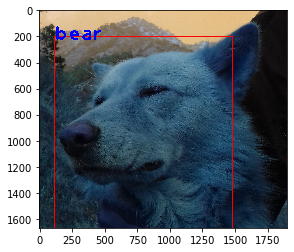

In [89]:
n_det = len(boxes)

indexes = cv2.dnn.NMSBoxes(boxes, confidences, 0.5, 0.3)

for i in range(n_det):
    if i in indexes:
        x, y, w, h = boxes[i]
        label = str(classes[class_ids[i]])
        cv2.rectangle(original_image, (x, y), (x+h, y+w), (255, 0, 0), 5)
        cv2.putText(original_image, label, (x, y+30), cv2.FONT_HERSHEY_PLAIN, 10, (0, 0, 255), 15)

plt.imshow(original_image)
